# Get the data

Get the data processed in the previous notebook (Exploratory Data Analysis)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from src.constants import X_TRAIN_PATH, X_TEST_PATH, Y_TRAIN_PATH, Y_TEST_PATH

# save the processed data to their corresponding files
X_train = pd.read_csv(filepath_or_buffer=X_TRAIN_PATH, sep=',')
X_test = pd.read_csv(filepath_or_buffer=X_TEST_PATH, sep=',')

y_train = pd.read_csv(filepath_or_buffer=Y_TRAIN_PATH, sep=',')
y_train = y_train['Outcome'].to_numpy()

y_test = pd.read_csv(filepath_or_buffer=Y_TEST_PATH, sep=',')
y_test = y_test['Outcome'].to_numpy()

In [28]:
# verify x_train
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,84,0,0,0,23.6,0.304,21
1,9,112,82,24,0,28.2,0.880,50
2,1,139,46,19,83,28.7,0.654,22
3,0,161,50,0,0,23.6,0.254,65
4,6,134,80,37,210,41.5,0.238,46


In [29]:
# verify x_test
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.165,21
2,2,108,64,0,0,30.8,0.165,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50


In [30]:
# verify y_train
y_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [31]:
# verify y_test
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

# Option 1. Default model

## Step 1: Initialization and training of the model

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
print(f"Hyperparameters of the default model: {model.get_params()}")

Hyperparameters of the default model: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


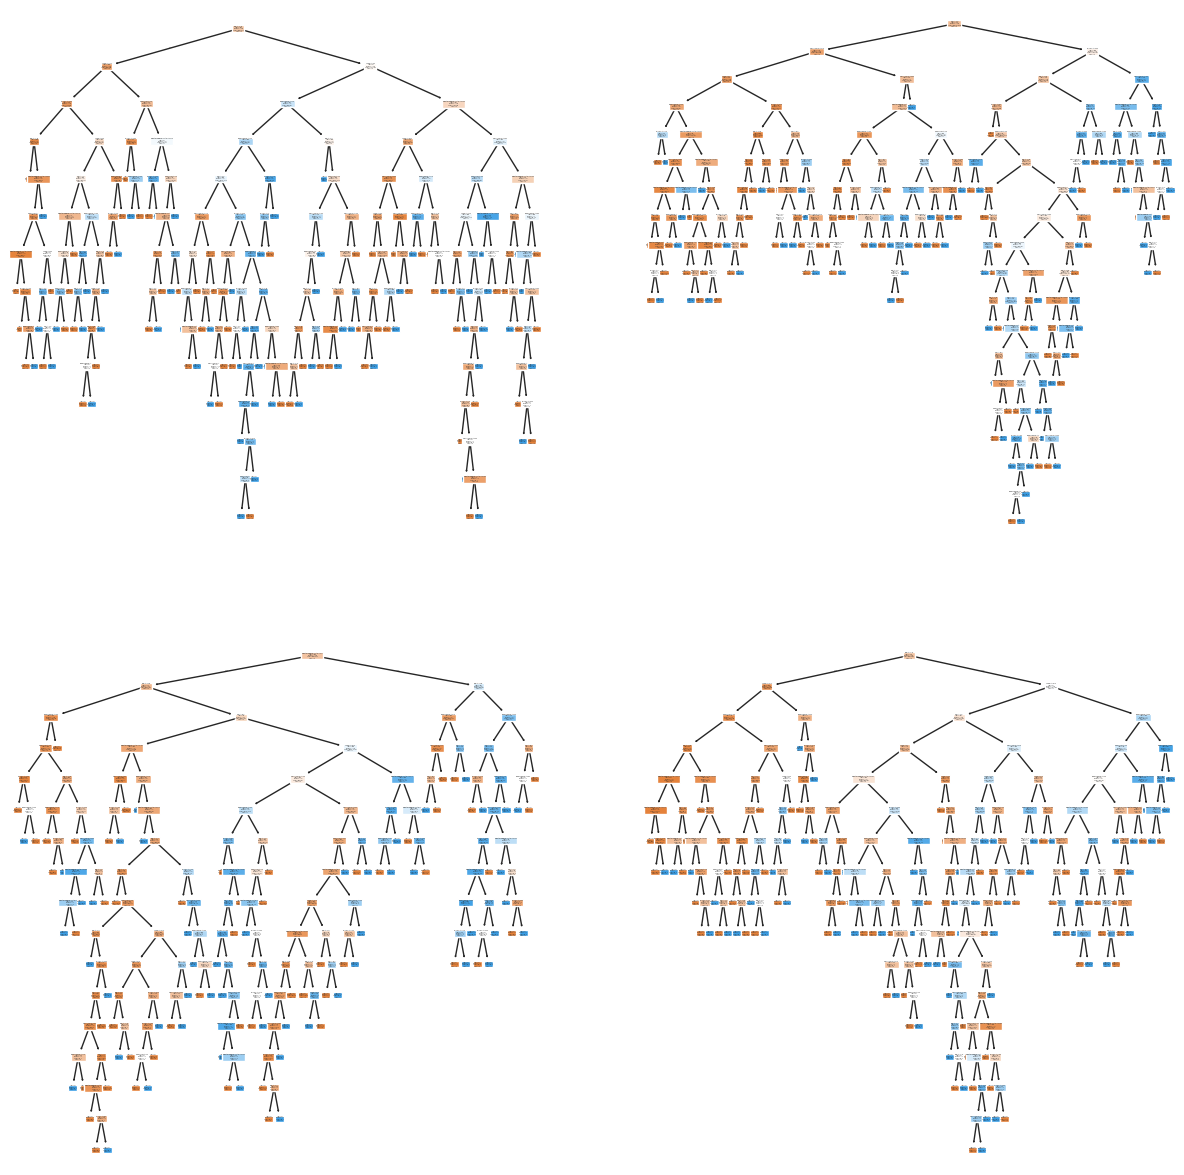

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# we are going to show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

## Step 2: Model prediction

In [35]:
# make the prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [36]:
# make the prediction of the probabilities of being one class or another
y_prob = model.predict_proba(X_test)

## Step 3: Metrics

Let's print the full report of the model

In [37]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            log_loss, classification_report)

default_model_accuracy = accuracy_score(y_test, y_pred)
default_model_precision = precision_score(y_test, y_pred)
default_model_recall = recall_score(y_test, y_pred)
default_model_f1 = f1_score(y_test, y_pred)
default_model_auc_roc = roc_auc_score(y_test, y_prob[:, 1])
default_model_log_loss = log_loss(y_test, y_prob)
default_model_confusion = confusion_matrix(y_test, y_pred)
default_model_report = classification_report(y_test, y_pred)

print(f'Accuracy: {default_model_accuracy}')
print(f'Precision: {default_model_precision}')
print(f'Recall: {default_model_recall}')
print(f'F1-Score: {default_model_f1}')
print(f'AUC-ROC: {default_model_auc_roc}')
print(f'Confusion Matrix:\n{default_model_confusion}')
print(f'Log Loss: {default_model_log_loss}')
print(f'Classification Report:\n{default_model_report}')

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1-Score: 0.6548672566371682
AUC-ROC: 0.8165289256198347
Confusion Matrix:
[[78 21]
 [18 37]]
Log Loss: 0.5003928425994287
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Here the analysis.

Now let's draw the confusion matrix

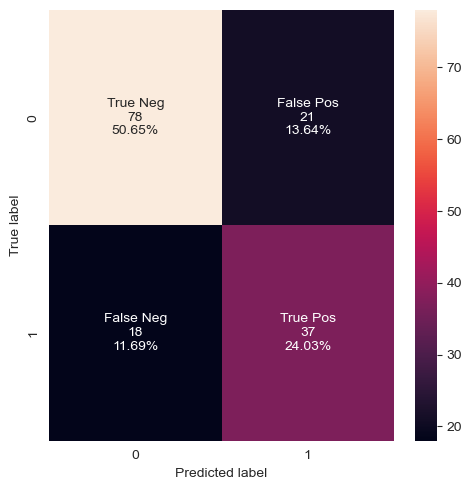

In [38]:
from src.draw_utils import draw_confusion_matrix

draw_confusion_matrix(confusion=default_model_confusion)

The interpretation of a confusion matrix is as follows:

- **True positive (TP)**: corresponds to the number 37 and are the cases where the model predicted positive **(the person has diabetes)** and the actual class is also positive.
- **True negative (TN)**: Corresponds to the number 78 and are the cases where the model predicted negative **(the person does not have diabetes)** and the actual class is also negative.
- **False positive (FP)**: Corresponds to the number 21 and are the cases in which the model predicted positive, but the actual class is negative.
- **False negative (FN)**: Corresponds to the number 18 and are the cases where the model predicted negative, but the actual class is positive.

# Option 2. Model with optimization

In [39]:
# create another model
opt_model = RandomForestClassifier(random_state=42)

## Step 1: Create the hyperparameter optimization model

In [40]:
from sklearn.model_selection import GridSearchCV

# define the parameters that we want to adjust by hand, depends on the model to use
hyperparams = {
    'n_estimators': [10, 20, 30, 50, 100],
    'bootstrap': [True, False],
    'max_depth': [1, 2, 5, 7, 10, None],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

# initialize the grid
grid = GridSearchCV(opt_model, hyperparams, scoring = 'accuracy', cv = 5, n_jobs=-1, verbose=1)

## Step 2: Fit the model

In [41]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits
Best hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


## Step 3: Get the best model and predict

In [42]:
# get the best parameters and model
best_params = grid.best_params_
best_model: RandomForestClassifier = grid.best_estimator_

<Figure size 1500x1500 with 0 Axes>

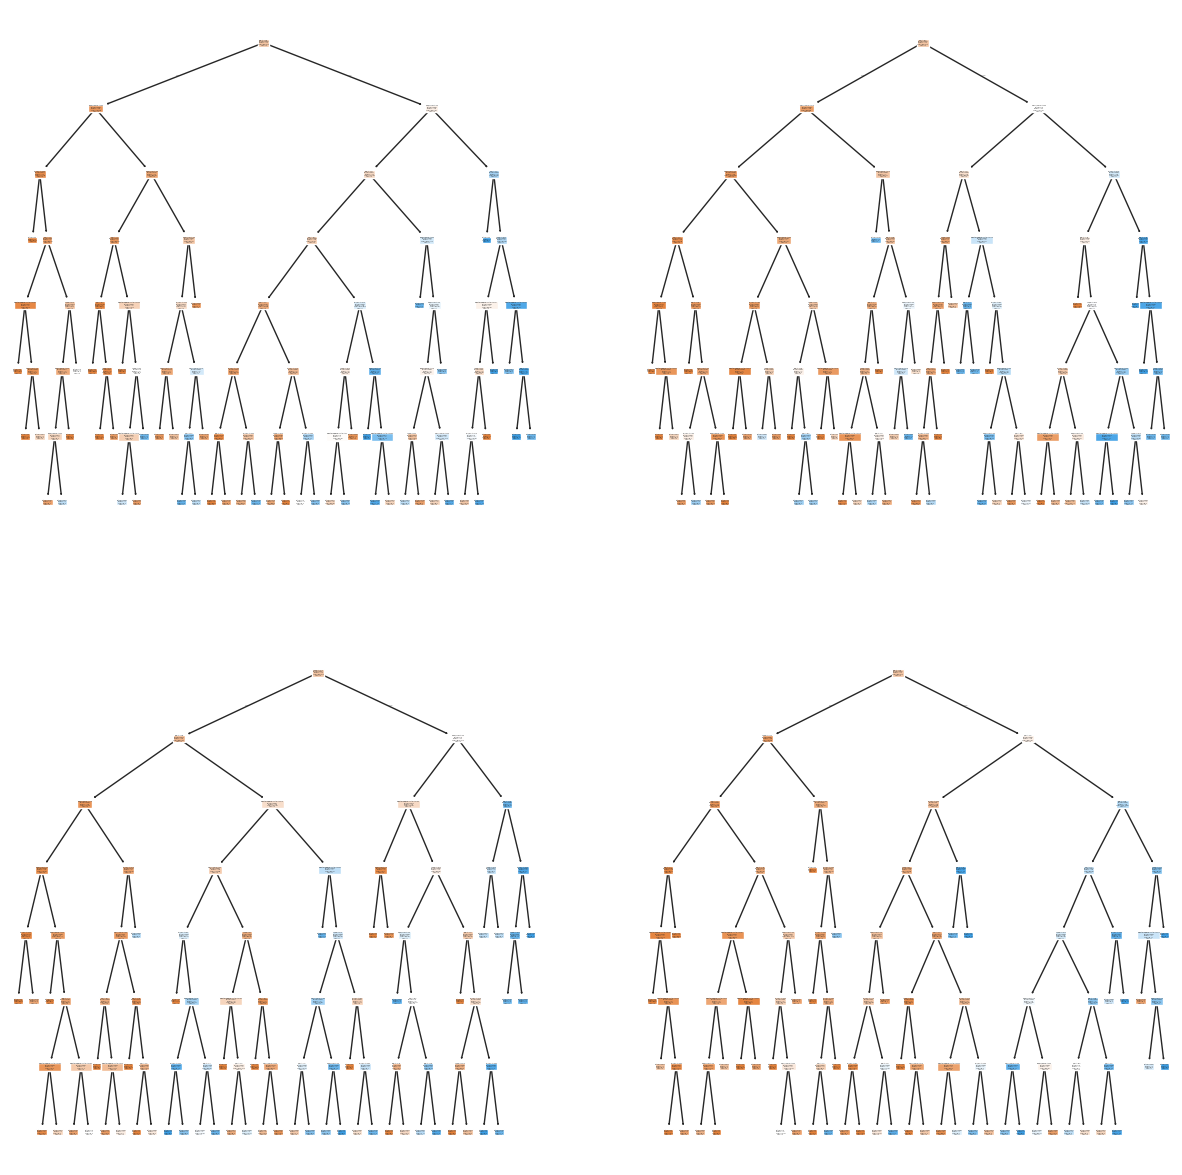

In [43]:
plt.figure(figsize=(15,15))

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# we are going to show the first 4 trees out of the 100 generated (default)
tree.plot_tree(best_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [44]:
# predict the values
y_pred = best_model.predict(X_test)

In [45]:
# make the prediction of the probabilities of being one class or another
y_prob = best_model.predict_proba(X_test)

## Step 4: Metrics of the model

In [46]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            log_loss, classification_report)

optimized_model_accuracy = accuracy_score(y_test, y_pred)
optimized_model_precision = precision_score(y_test, y_pred)
optimized_model_recall = recall_score(y_test, y_pred)
optimized_model_f1 = f1_score(y_test, y_pred)
optimized_model_auc_roc = roc_auc_score(y_test, y_prob[:, 1])
optimized_model_log_loss = log_loss(y_test, y_prob)
optimized_model_confusion = confusion_matrix(y_test, y_pred)
optimized_model_report = classification_report(y_test, y_pred)

print(f'Accuracy: {optimized_model_accuracy}')
print(f'Precision: {optimized_model_precision}')
print(f'Recall: {optimized_model_recall}')
print(f'F1-Score: {optimized_model_f1}')
print(f'AUC-ROC: {optimized_model_auc_roc}')
print(f'Confusion Matrix:\n{optimized_model_confusion}')
print(f'Log Loss: {optimized_model_log_loss}')
print(f'Classification Report:\n{optimized_model_report}')

Accuracy: 0.7337662337662337
Precision: 0.6346153846153846
Recall: 0.6
F1-Score: 0.616822429906542
AUC-ROC: 0.8148760330578513
Confusion Matrix:
[[80 19]
 [22 33]]
Log Loss: 0.5017715519791851
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



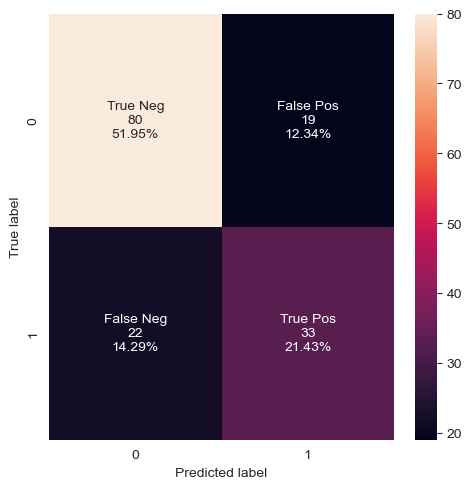

In [47]:
draw_confusion_matrix(confusion=optimized_model_confusion)

The interpretation of a confusion matrix is as follows:

- **True positive (TP)**: corresponds to the number 33 and are the cases where the model predicted positive **(the person has diabetes)** and the actual class is also positive.
- **True negative (TN)**: Corresponds to the number 80 and are the cases where the model predicted negative **(the person does not have diabetes)** and the actual class is also negative.
- **False positive (FP)**: Corresponds to the number 19 and are the cases in which the model predicted positive, but the actual class is negative.
- **False negative (FN)**: Corresponds to the number 22 and are the cases where the model predicted negative, but the actual class is positive.

# Conclusion

In [48]:

from src.markdown_utils import show_comparison_table

# set the metrics to use
metrics: list[str] = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# get the metrics of the default and optimized list values
default_model_metrics: list[float] = [default_model_accuracy, default_model_precision, default_model_recall, default_model_f1, default_model_auc_roc]
optimized_model_metrics: list[float] = [optimized_model_accuracy, optimized_model_precision, optimized_model_recall, optimized_model_f1, optimized_model_auc_roc]

# construct the Markdown table
show_comparison_table(
    metric_names=metrics,
    default_metrics=default_model_metrics,
    optimized_metrics=optimized_model_metrics,
)

| Metric | Default Model | Optimized Model |
|---|---|---|
| Accuracy | 0.75 | 0.73 |
| Precision | 0.64 | 0.63 |
| Recall | 0.67 | 0.6 |
| F1-Score | 0.65 | 0.62 |
| AUC-ROC | 0.82 | 0.81 |


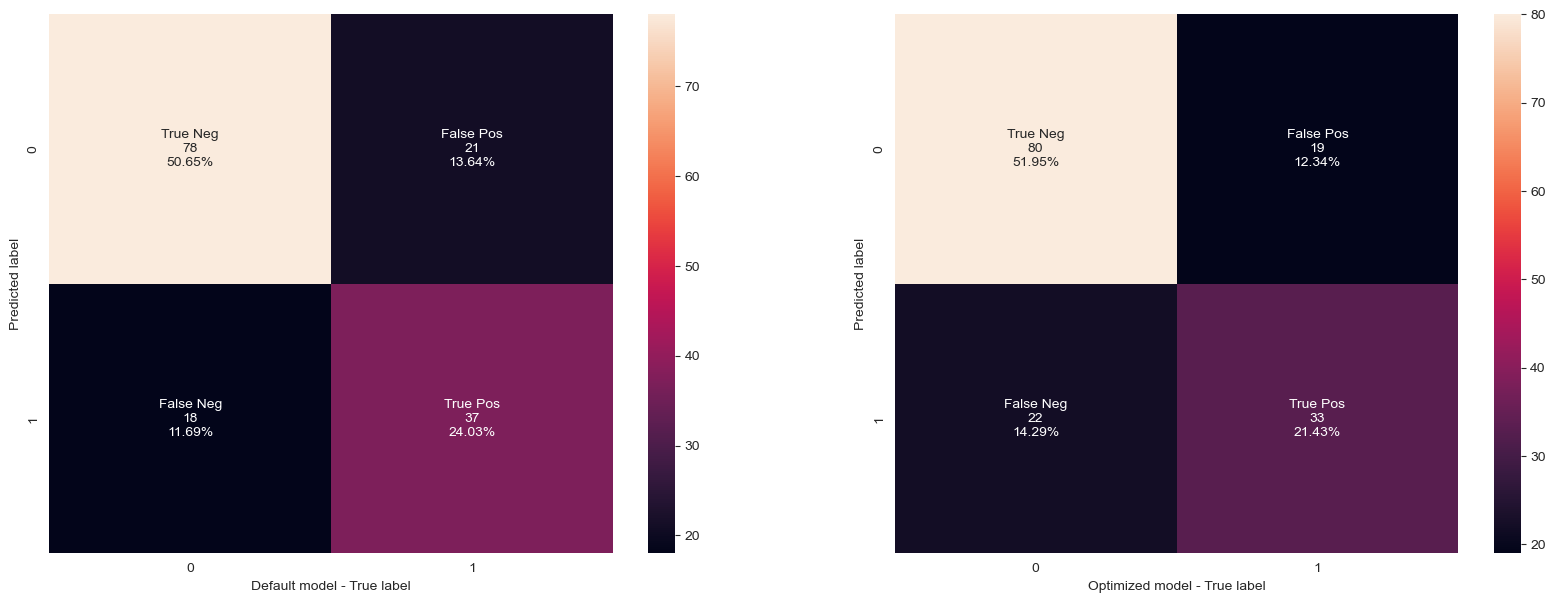

<Figure size 1000x500 with 0 Axes>

In [49]:
from src.draw_utils import draw_comparison_confusion_matrices

draw_comparison_confusion_matrices(confusion_1=default_model_confusion, confusion_2=optimized_model_confusion, confusion_matrix_1_name='Default model', confusion_matrix_2_name='Optimized model')

WE can see that the default model and the optimized one are really close, the metrics are not too different, one model has a better performance with the negative label 0 (do not have diabetes) and other model have better results with the positive label 1 (have diabetes). The results are better than the decision tree, primarily on the ability of the model to make good predictions on the negative label, these results could also come from the treatments done to the outliers.

The default model has a better performance with the label 1, and it has better overall metrics. While the optimized model has a better performance with the label 0.

As said before the metrics are very close and in this kind of scenario we can accept the default model because having better performance with label 1 (has diabetes) is more important than having better performance with label 0 (do not have diabetes), because the model is going to be used to detect if a person has diabetes or not, and we want to be sure that the model is going to detect the people that have the condition.